### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
random.seed(42)

In [3]:
# read files
stroop = pd.read_csv('stroopdata.csv')
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [38]:
# 倒入
# import random
# 制作fack数据
stroopfack = stroop.sample(stroop.shape[0],replace = True)
stroopfack.head()

,Congruent,Incongruent
2,9.564,21.214
13,16.929,20.330
12,15.073,17.510
13,16.929,20.330
9,14.480,26.282


In [42]:
from scipy import stats
# 使用scipy的stats的方法
#_rel是配对的，ind是独立的，使用那个根据数据判断
tstats, ptwo = stats.ttest_ind(stroopfack['Congruent'], stroopfack['Incongruent'])
# 如果是单尾的需要把ptwo除2
print('t检验：%1.2f，p值：%1.9f' %(tstats, ptwo))

t检验：-7.62，p值：0.000000001


判断方法1:
- $\alpha$ = 0.05
- 0 < p < $\alpha$

判断方法2:
- 查询t值表（$\alpha$ = 0.05）
- t-critical值为1.741
- t值 > t-critical

In [7]:
# import scipy的ststs
from scipy import stats

# 制作假数据（通过随机抽样方式，后续掩饰和实际项目不同）
stroopfack = stroop.sample(stroop.shape[0],replace = True)

# 设定记录bootstrap方法得出t，p值的空列表
boot_t= []
boot_p = []

# 使用for in range 循环1000遍
for i in range(1000):
    # 生成sample，自展为True(replace = Ture)
    # 生成的数量和sample数量相同（stroopfack.shape[0]）
    bootstrap_sample = stroopfack.sample(stroopfack.shape[0],
                                         replace = True)
    # 使用stats中的ttest_rel得出配对T检验的T值和Z值
    t, p = stats.ttest_rel(bootstrap_sample['Congruent'], 
                           bootstrap_sample['Incongruent'])
    # 生成mean_s 赋值为随机抽取的平均值
    # mean_s = bootstrap_sample.mean()
    # 将这个值附加到列表中
    boot_t.append(t)
    boot_p.append(p)

# 之后对两个列表做平均就可得出使用Bootstrap方法得出的T值和P值

In [ ]:
# 使用自助法模拟1000次抽样
# 先设定空列表
tsample = []
psample = []
# 使用for in range 循环1000遍
for i in range(1000):
    # 按照自展法代码得出sample，此处略去
    sample = blablabla 
    t, p = blablabla
    # 将t, p追加写到列表中
    tsample.append(t)
    psample.append(p)
    
# 循环完成后，将得到两个列表，每个有10000个值

In [35]:
np.array(boott).mean(), np.array(bootptwo).mean()

(-8.768812614689825, 2.5075473184691463e-07)

In [6]:
# 使用公式直接计算（drop）
mean1 = stroop['Congruent'].mean()
mean2 = stroop['Incongruent'].mean()

n = stroop.shape[0]
se = mean1 / np.sqrt(n-1)

mean1, mean2

(14.051124999999999, 22.015916666666666)

In [ ]:
stroop.mean()

In [27]:
stroop.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Congruent,12.079,16.791,9.564,8.630,14.669,12.238,14.692,8.987,9.401,14.480,...,18.200,12.130,18.495,10.639,11.344,12.369,12.944,14.233,19.710,16.004
Incongruent,19.278,18.741,21.214,15.687,22.803,20.878,24.572,17.394,20.762,26.282,...,35.255,22.158,25.139,20.429,17.425,34.288,23.894,17.960,22.058,21.157


In [35]:
x = stroop.T.columns

In [39]:
y1 = stroop.T.loc['Congruent']
y2 = stroop.T.loc['Incongruent']

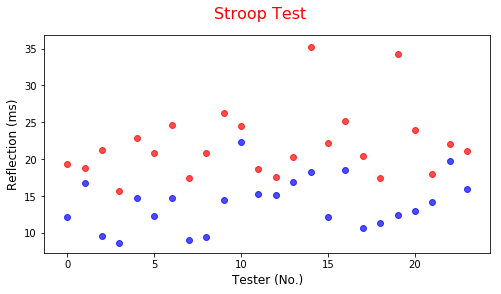

In [55]:
# # 先是设定图纸和图画位置
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 1, 1)

# # 在一张图上画散点图
ax1.scatter(x, y1, color = 'b', alpha = 0.7, label = "Congruent")
ax1.scatter(x, y2, color = 'r', alpha = 0.7, label = "Incongruent")

# # label、title等的细化
ax1.set_ylabel('Reflection (ms)', fontsize = 12)
ax1.set_xlabel('Tester (No.)', fontsize = 12)
fig.suptitle('Stroop Test',
             fontsize = 16, color = 'red');


答案： 
- 自变量：被测试人看到的是Congruent的测试还是Incongruent的测试
- 因变量：被测试人的反应时间（推测单位ms）

推导：
- 本测试基于斯特普鲁效应（左右脑认知的相互影响），通过控制文字描述与文字颜色的条件，检查人的反应时间。（https://en.wikipedia.org/wiki/Stroop_effect）
- 参与测试人会看到两类图片进行识别：
    - Congruent 文字描述与颜色一致
    - Incongruent 文字描述与颜色不一致
- 这两种图片的反应时间记录为每一行数据
    - 数据说明中虽然没有标明单位（Sample Unit）但从量值猜测应该是毫秒

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

--答案写这里--
<center> $ H_0:p_{con}−p_{in}\ge0 $ 零假设为颜色和文字意义不一致的并不比一致的更费时间。</center>

<center> $ H_1:p_{con}−p_{in}<0 $ 备则假设为颜色和文字意义不一致的更费时间。</center>

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析

--答案写这里--

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [2]:
# 在这里创建可视化图表

--答案写这里--

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [3]:
# 在这里执行统计检验

--答案写这里--

----------------------------------------------------------------------------------------------------------------------------------

1.选择Z检验 or T检验？理由是什么？

2.选择单样本T检验 or 双样本T检验？理由是什么？

3.选择相依样本T检验 or 独立样本T检验？理由是什么？

4.选择左侧/右侧，单尾T检验 or 双尾T检验？理由是什么？